# Titanic Disaster

Vamos a explorar el dataset de titanic


importa `matplotlib`, `numpy` y `pandas`

In [1]:
%pwd

'C:\\Users\\alejo\\UCEMA\\poo_teorica\\poo_ejercicios\\04-transformaciones'

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic_df = pd.read_csv("data/kaggle_titanic.csv")
df = titanic_df


fijate la ubicación del archivo

carga el dataset

Explorá los métodos básicos (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).


In [13]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Fijate que hay missings en  `Cabin`. Elimina la columna

 [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [15]:
del titanic_df["Cabin"]

In [16]:
list(titanic_df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
df = df.drop(columns="Cabin")

KeyError: "['Cabin'] not found in axis"

In [ ]:
#titanic_df.drop('Cabin', axis=1, inplace=True)

## Analisis por clase


Usa `groupby()` y crea un dataframe por clase contando la cantidad de tickets vendidos por clase  (1, 2 or 3)

In [19]:
titanic_df.groupby("Pclass").agg("count")["PassengerId"]

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [20]:
pclass_df = titanic_df.groupby("Pclass").count()["PassengerId"].to_frame()

In [21]:
pclass_df

,PassengerId
Pclass,
1,216
2,184
3,491


Hace un gráfico de barras

<AxesSubplot:xlabel='Pclass'>

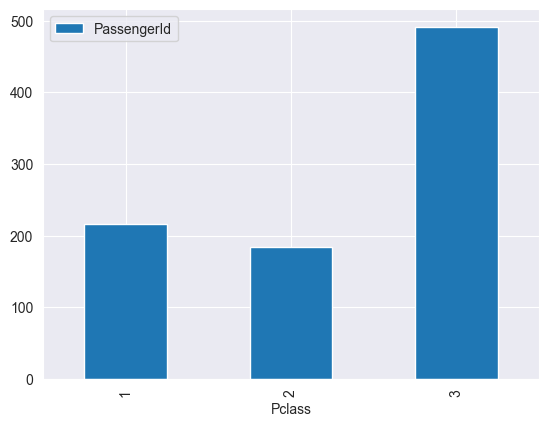

In [22]:
pclass_df.plot(kind="bar")

analicemos **survivors**.

Armar un barchart con la frecuencia de survivals por clase

In [23]:
(titanic_df["Pclass"]==1).sum()

216

In [24]:
(titanic_df["Survived"]==1).sum()

342

In [25]:
(titanic_df["Survived"]).sum()

342

In [26]:
len(titanic_df)

891

In [27]:
(titanic_df["Survived"]).sum()/len(titanic_df)

0.3838383838383838

In [28]:
titanic_df.Survived.unique()

array([0, 1], dtype=int64)

In [29]:
titanic_df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [30]:
titanic_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [31]:
titanic_df[["Pclass","Survived"]].value_counts()

Pclass  Survived
3       0           372
1       1           136
3       1           119
2       0            97
        1            87
1       0            80
dtype: int64

In [33]:
titanic_df[titanic_df["Pclass"]==1]["Survived"].sum()/(titanic_df[titanic_df["Pclass"]==1])

TypeError: unsupported operand type(s) for /: 'int' and 'str'

In [34]:
titanic_df.groupby("Pclass").agg("count")["PassengerId"]

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [35]:
pclass_df = titanic_df.groupby("Pclass").count()["PassengerId"].to_frame()

In [36]:
pclass_df

,PassengerId
Pclass,
1,216
2,184
3,491


Hace un gráfico de barras

<AxesSubplot:xlabel='Pclass'>

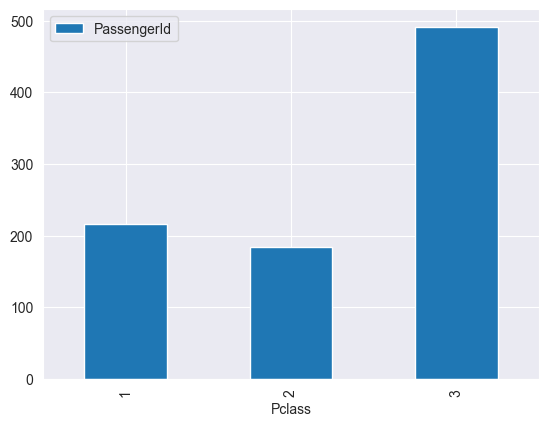

In [37]:
pclass_df.plot(kind="bar")

analicemos **survivors**.

Armar un barchart con la frecuencia de survivals por clase

In [38]:
(titanic_df["Pclass"]==1).sum()

216

In [39]:
(titanic_df["Survived"]==1).sum()

342

In [40]:
(titanic_df["Survived"]).sum()

342

In [41]:
len(titanic_df)

891

In [42]:
(titanic_df["Survived"]).sum()/len(titanic_df)

0.3838383838383838

In [43]:
titanic_df.Survived.unique()

array([0, 1], dtype=int64)

In [44]:
titanic_df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [45]:
titanic_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [46]:
titanic_df[["Pclass","Survived"]].value_counts()

Pclass  Survived
3       0           372
1       1           136
3       1           119
2       0            97
        1            87
1       0            80
dtype: int64

In [47]:
titanic_df[titanic_df["Pclass"]==1]["Survived"].sum()/(titanic_df[titanic_df["Pclass"]==1])

TypeError: unsupported operand type(s) for /: 'int' and 'str'

<AxesSubplot:xlabel='Pclass'>

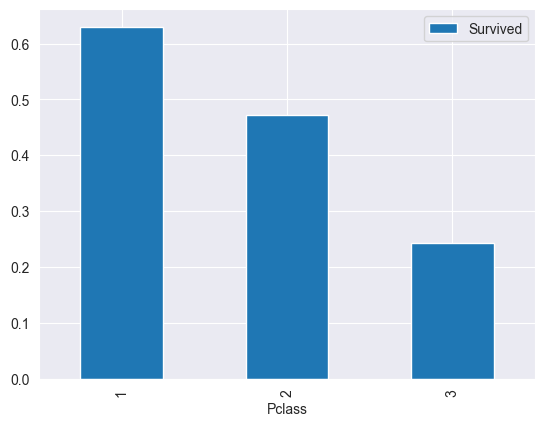

In [48]:
titanic_df[["Pclass","Survived"]].groupby('Pclass').mean().plot(kind='bar')

### Analisis por genero

fijate la columna de Sex

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)

In [49]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

Hace un barchart para ver quienes sobreviven más según genero

<AxesSubplot:xlabel='Sex'>

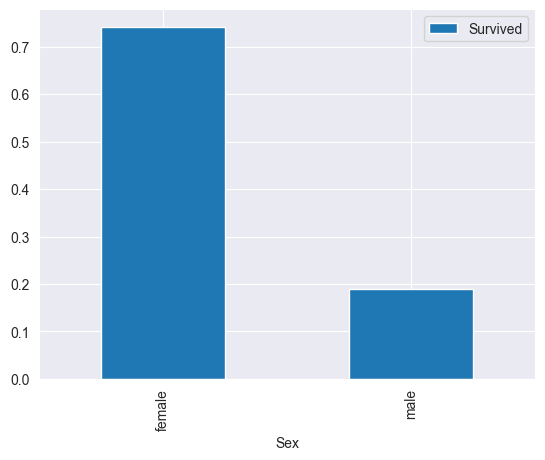

In [50]:
titanic_df[['Survived', 'Sex']].groupby('Sex').mean().plot(kind='bar')

## Niños

crea un dataset para edad menor a 17 años

In [51]:
children_df = titanic_df[titanic_df['Age'] <= 17]
children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q


¿cuantos chicos había en el titanic?

In [52]:
children_df.shape[0]

113

¿Cuantos sorevivieron?

In [53]:
children_df['Survived'].sum()

61

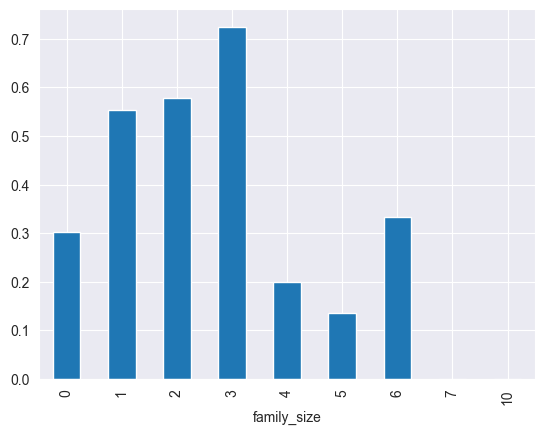

In [54]:
titanic_df['family_size'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.groupby('family_size').mean()['Survived'].plot(kind='bar');

<AxesSubplot:xlabel='Title'>

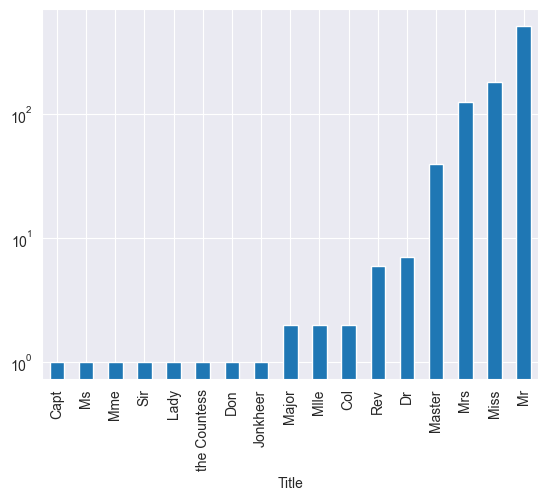

In [55]:
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic_df.groupby('Title').count()['PassengerId'].sort_values().plot(kind='bar', logy=True)

<AxesSubplot:xlabel='Title'>

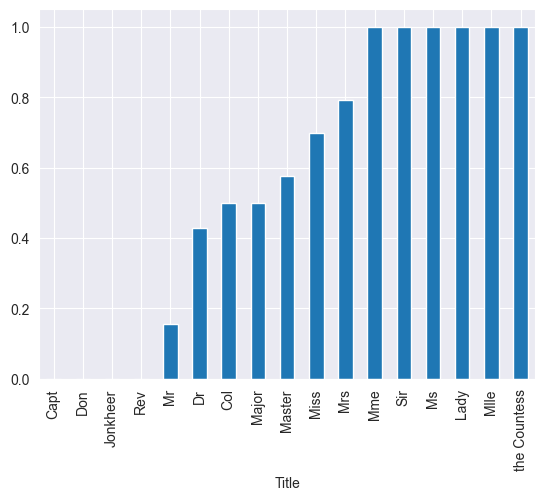

In [56]:
titanic_df.groupby('Title').mean()['Survived'].sort_values().plot(kind='bar')